In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("train - train.csv")


In [3]:
# Shape of data
df.shape
#2000 rows and 21 columns

(2000, 21)

### Finding Missing Values

In [4]:
missing_data = df[df.isnull().any(axis=1)]
missing_data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
157,1224,0,0.5,0,NaN,NaN,NaN,NaN,NaN,NaN,...,747.0,826.0,506.0,10.0,0.0,11,1,1,1,0
158,1356,0,2.8,0,NaN,NaN,NaN,NaN,NaN,NaN,...,1612.0,1983.0,3702.0,17.0,0.0,19,0,0,0,3
217,1336,0,0.9,0,5.0,1.0,17.0,NaN,194.0,5.0,...,55.0,583.0,1869.0,13.0,1.0,16,1,1,1,1
261,728,0,2.7,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.0,1.0,12,1,1,1,1
276,1662,0,0.5,0,NaN,NaN,NaN,0.8,126.0,4.0,...,32.0,1509.0,3760.0,9.0,5.0,13,1,1,1,3
292,1995,1,1.9,0,6.0,0.0,9.0,0.8,139.0,6.0,...,NaN,1963.0,1203.0,14.0,12.0,18,1,1,1,2
293,1517,0,0.5,0,6.0,1.0,48.0,0.6,143.0,5.0,...,NaN,1489.0,2822.0,15.0,5.0,11,1,1,1,3
341,811,1,2.4,1,5.0,1.0,2.0,0.3,106.0,6.0,...,NaN,NaN,NaN,NaN,NaN,2,1,0,1,1
371,1011,0,1.1,0,NaN,NaN,NaN,NaN,NaN,NaN,...,481.0,749.0,2261.0,7.0,6.0,16,1,1,1,1


### Handling Missing Values

In [5]:
from sklearn.impute import KNNImputer

In [6]:
df_filled = df.copy()

# Identify columns with missing values (NaN)
columns_with_missing_values = df_filled.columns[df_filled.isnull().any(axis=0)]

# Remove 'price_range' from columns_with_missing_values (assuming it contains missing values, if not, adjust accordingly)
columns_with_missing_values = columns_with_missing_values.drop('price_range', errors='ignore')
columns_with_missing_values

Index(['fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w'],
      dtype='object')

In [7]:
# Apply KNNImputer to fill missing values for columns with missing values

imputer = KNNImputer()

df_filled[columns_with_missing_values] = imputer.fit_transform(df_filled[columns_with_missing_values])

df_filled.iloc[[157, 158, 217, 261]]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
157,1224,0,0.5,0,1.8,0.8,30.6,0.44,132.8,4.6,...,747.0,826.0,506.0,10.0,0.0,11,1,1,1,0
158,1356,0,2.8,0,3.0,0.4,44.2,0.34,139.0,3.2,...,1612.0,1983.0,3702.0,17.0,0.0,19,0,0,0,3
217,1336,0,0.9,0,5.0,1.0,17.0,0.38,194.0,5.0,...,55.0,583.0,1869.0,13.0,1.0,16,1,1,1,1
261,728,0,2.7,1,6.6,0.4,29.8,0.50,130.6,5.0,...,604.2,1649.2,2433.6,5.0,1.0,12,1,1,1,1


#### Missing Values are filled above now replacing new df into old df

In [8]:
df = df_filled
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0,2
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0.0,1.0,2.0,0.8,106.0,6.0,...,1222.0,1890.0,668.0,13.0,4.0,19,1,1,0,0
1996,1965,1,2.6,1,0.0,0.0,39.0,0.2,187.0,4.0,...,915.0,1965.0,2032.0,11.0,10.0,16,1,1,1,2
1997,1911,0,0.9,1,1.0,1.0,36.0,0.7,108.0,8.0,...,868.0,1632.0,3057.0,9.0,1.0,5,1,1,0,3
1998,1512,0,0.9,0,4.0,1.0,46.0,0.1,145.0,5.0,...,336.0,670.0,869.0,18.0,10.0,19,1,1,1,0


In [9]:
df[df.isnull().any(axis=1)]
# Now no value is missing

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


## Applying Feature Engineering

In [10]:
# except using 21 columns we only focus on main columns which plays vital role for price range

In [11]:
from sklearn.feature_selection import SelectKBest, chi2

In [12]:
# Assuming 'df_filled' contains your DataFrame with missing values filled
X = df_filled.drop('price_range', axis=1)  # Features (excluding the target variable)
y = df_filled['price_range']  # Target variable
X

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,2.0,20.0,756.0,2549.0,9.0,7.0,19,0,0,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,6.0,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,6.0,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,9.0,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,14.0,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0.0,1.0,2.0,0.8,106.0,6.0,14.0,1222.0,1890.0,668.0,13.0,4.0,19,1,1,0
1996,1965,1,2.6,1,0.0,0.0,39.0,0.2,187.0,4.0,3.0,915.0,1965.0,2032.0,11.0,10.0,16,1,1,1
1997,1911,0,0.9,1,1.0,1.0,36.0,0.7,108.0,8.0,3.0,868.0,1632.0,3057.0,9.0,1.0,5,1,1,0
1998,1512,0,0.9,0,4.0,1.0,46.0,0.1,145.0,5.0,5.0,336.0,670.0,869.0,18.0,10.0,19,1,1,1


In [13]:
# Initialize SelectKBest with chi2 score function
selector = SelectKBest(score_func=chi2, k=10)
selector

SelectKBest(score_func=<function chi2 at 0x0000024D185D8C20>)

In [14]:
# Fit selector to features and target
selector.fit(X, y)

SelectKBest(score_func=<function chi2 at 0x0000024D185D8C20>)

In [15]:
# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)


In [16]:
selected_indices

array([ 0,  4,  6,  8, 10, 11, 12, 13, 15, 16], dtype=int64)

## Selected Columns

In [17]:
# Get the names of the selected columns
selected_columns = X.columns[selected_indices]
selected_columns

Index(['battery_power', 'fc', 'int_memory', 'mobile_wt', 'pc', 'px_height',
       'px_width', 'ram', 'sc_w', 'talk_time'],
      dtype='object')

## Converting to Vector

In [18]:
from sklearn import preprocessing

In [19]:
X.columns[selected_indices]

Index(['battery_power', 'fc', 'int_memory', 'mobile_wt', 'pc', 'px_height',
       'px_width', 'ram', 'sc_w', 'talk_time'],
      dtype='object')

In [20]:
type(X.columns[selected_indices])

pandas.core.indexes.base.Index

In [21]:
selected_df =  pd.DataFrame(X, columns=X.columns[selected_indices])
selected_df

,battery_power,fc,int_memory,mobile_wt,pc,px_height,px_width,ram,sc_w,talk_time
0,842,1.0,7.0,188.0,2.0,20.0,756.0,2549.0,7.0,19
1,1021,0.0,53.0,136.0,6.0,905.0,1988.0,2631.0,3.0,7
2,563,2.0,41.0,145.0,6.0,1263.0,1716.0,2603.0,2.0,9
3,615,0.0,10.0,131.0,9.0,1216.0,1786.0,2769.0,8.0,11
4,1821,13.0,44.0,141.0,14.0,1208.0,1212.0,1411.0,2.0,15
...,...,...,...,...,...,...,...,...,...,...
1995,794,0.0,2.0,106.0,14.0,1222.0,1890.0,668.0,4.0,19
1996,1965,0.0,39.0,187.0,3.0,915.0,1965.0,2032.0,10.0,16
1997,1911,1.0,36.0,108.0,3.0,868.0,1632.0,3057.0,1.0,5
1998,1512,4.0,46.0,145.0,5.0,336.0,670.0,869.0,10.0,19


In [22]:
selected_df_norm = preprocessing.normalize(selected_df)
selected_df_norm

array([[3.01212062e-01, 3.57734040e-04, 2.50413828e-03, ...,
        9.11864069e-01, 2.50413828e-03, 6.79694677e-03],
       [2.85856828e-01, 0.00000000e+00, 1.48387972e-02, ...,
        7.36620289e-01, 8.39931915e-04, 1.95984113e-03],
       [1.64910343e-01, 5.85827153e-04, 1.20094566e-02, ...,
        7.62454039e-01, 5.85827153e-04, 2.63622219e-03],
       ...,
       [4.71499649e-01, 2.46729277e-04, 8.88225398e-03, ...,
        7.54251400e-01, 2.46729277e-04, 1.23364639e-03],
       [7.93950343e-01, 2.10039773e-03, 2.41545739e-02, ...,
        4.56311407e-01, 5.25099433e-03, 9.97688923e-03],
       [1.25740104e-01, 1.23274611e-03, 1.10947150e-02, ...,
        9.66226404e-01, 9.86196891e-04, 4.93098445e-04]])

### Separating X-Train and X-Test

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(selected_df, y, test_size = 0.2, random_state = 42)

In [25]:
X_train.shape

(1600, 10)

In [26]:
X_test.shape

(400, 10)

## Applying Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
# Instantiate model with 1000 decision trees
model = RandomForestClassifier(n_estimators = 100)
model

RandomForestClassifier()

In [29]:
# Train the model on training data
model.fit(X_train, y_train)

RandomForestClassifier()

In [30]:
# Use the forest's predict method on the test data
predictions = model.predict(X_test)
predictions

array([0, 2, 1, 3, 1, 1, 2, 0, 3, 1, 0, 1, 2, 3, 2, 2, 3, 3, 1, 0, 0, 1,
       1, 2, 0, 1, 3, 2, 2, 0, 0, 0, 3, 0, 1, 1, 2, 0, 3, 0, 2, 3, 2, 0,
       3, 2, 1, 1, 3, 1, 3, 1, 0, 0, 1, 1, 1, 3, 0, 0, 1, 3, 3, 1, 0, 0,
       3, 3, 1, 2, 2, 2, 0, 1, 2, 0, 0, 3, 2, 2, 3, 2, 1, 0, 1, 3, 1, 3,
       3, 0, 3, 3, 2, 1, 3, 2, 2, 3, 1, 1, 0, 0, 1, 0, 0, 3, 2, 0, 1, 1,
       0, 0, 3, 1, 2, 2, 3, 2, 0, 2, 1, 3, 2, 1, 3, 3, 0, 3, 0, 2, 3, 0,
       2, 2, 0, 3, 1, 0, 0, 2, 3, 0, 2, 2, 0, 0, 0, 1, 1, 2, 3, 1, 1, 0,
       2, 2, 0, 1, 0, 1, 2, 3, 3, 2, 1, 0, 1, 2, 2, 3, 3, 1, 1, 0, 3, 1,
       1, 2, 1, 0, 0, 0, 0, 0, 3, 2, 0, 3, 0, 0, 0, 0, 1, 3, 3, 1, 0, 1,
       1, 1, 1, 2, 2, 2, 3, 3, 1, 2, 0, 0, 0, 2, 1, 1, 3, 1, 0, 2, 1, 1,
       3, 2, 3, 0, 0, 2, 1, 2, 0, 0, 2, 0, 2, 3, 2, 1, 1, 3, 3, 0, 1, 3,
       3, 3, 0, 3, 1, 2, 3, 3, 2, 1, 1, 3, 3, 1, 3, 3, 3, 3, 3, 0, 1, 2,
       2, 1, 2, 0, 2, 3, 2, 2, 2, 1, 0, 2, 0, 3, 3, 1, 3, 1, 0, 3, 1, 2,
       0, 0, 3, 0, 1, 2, 3, 3, 3, 1, 1, 0, 1, 3, 3,

## Accuracy Checker

In [31]:
# Directly by Model

model.score(X_test,y_test)

0.9275

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
# Accuracy Check By Sklearn Metrics

accuracy_score(y_test, predictions)

0.9275

## Saving Model Locally

In [34]:
import joblib

# Assuming you have a trained model named 'model'
# Save the trained model to a file
joblib.dump(model, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [35]:
loaded_model = joblib.load('random_forest_model.pkl')

### Checking Features Scores

In [36]:
feature_scores = pd.Series(loaded_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

ram              0.593350
battery_power    0.094915
px_height        0.064107
px_width         0.063374
mobile_wt        0.039505
int_memory       0.036758
pc               0.028662
talk_time        0.028461
sc_w             0.028026
fc               0.022841
dtype: float64

## Visualize feature scores of the features 

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns # statistical data visualization
%matplotlib inline

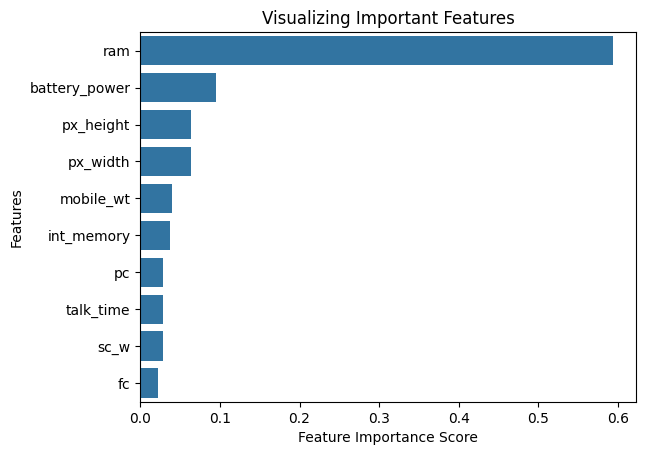

In [38]:
sns.barplot(x=feature_scores, y=feature_scores.index)

# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')


# Add title to the graph

plt.title("Visualizing Important Features")



# Visualize the graph

plt.show()

In [39]:
from sklearn.metrics import confusion_matrix

In [40]:
cm = confusion_matrix(y_test, predictions)
cm

array([[100,   5,   0,   0],
       [  3,  86,   2,   0],
       [  0,   5,  82,   5],
       [  0,   0,   9, 103]], dtype=int64)

## Visualizing Price Range

In [41]:
import seaborn as sns

<Axes: >

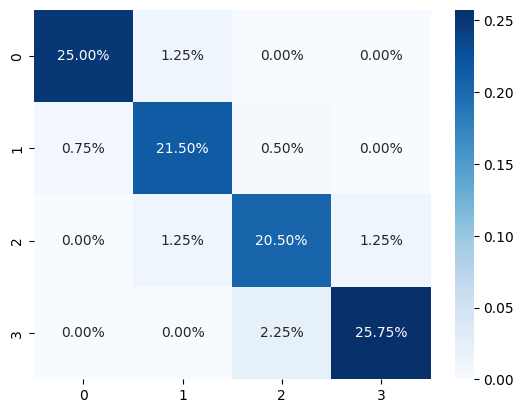

In [42]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')